In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score,
                             classification_report, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import LocalOutlierFactor
import missingno as msno
import warnings
warnings.simplefilter(action='ignore')


In [2]:
# Load dataset
df = pd.read_csv("diabetes.csv")

In [3]:
# Display basic information and check for null values
print(df.info())
print(df.describe())
print("Initial Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [4]:
# Replace 0 values with NaN in specified columns (assuming they’re missing values)
columns_to_replace = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.NaN)

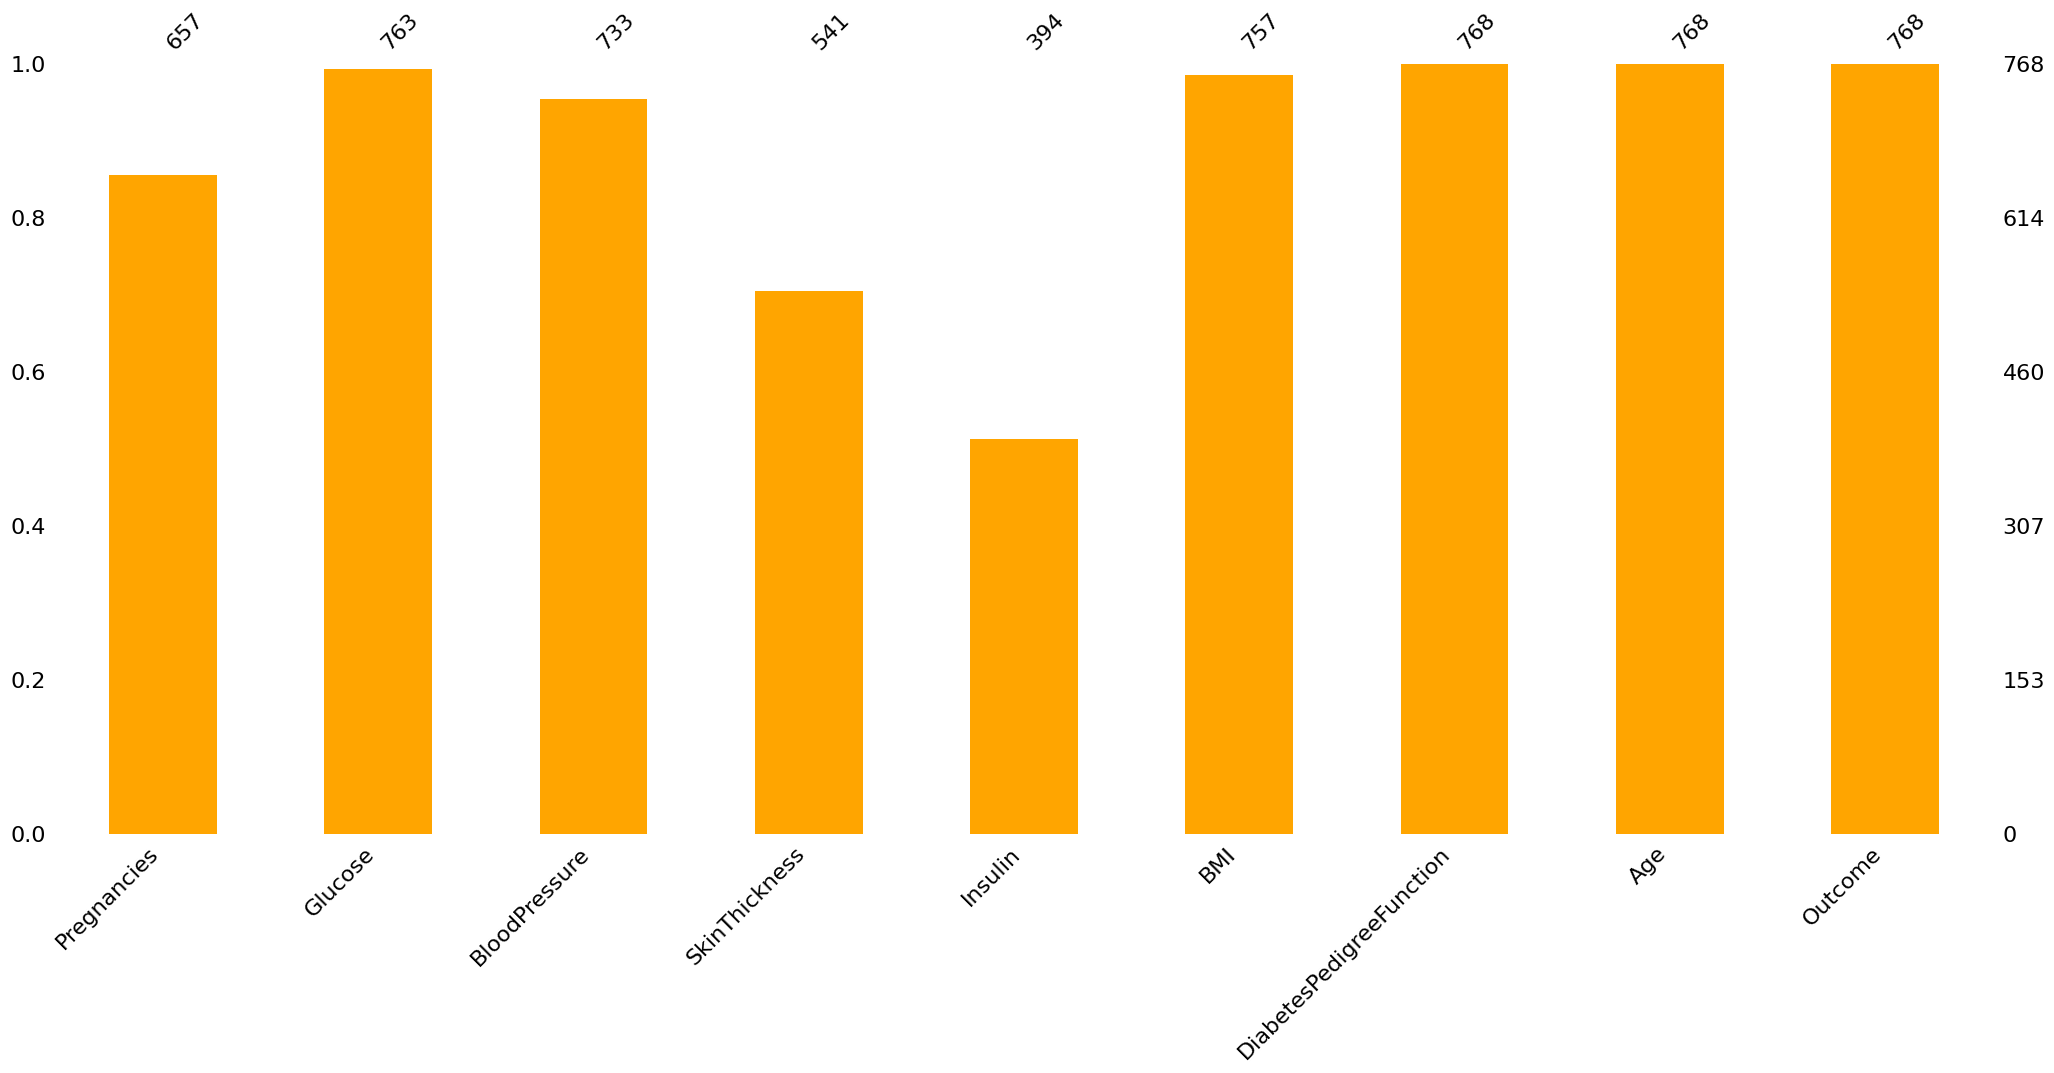

In [5]:
# Display missing values
msno.bar(df, color="orange")
plt.show()

In [6]:
# Filling missing values based on the median of the 'Outcome' classes
for col in columns_to_replace:
    df.loc[df[col].isnull() & (df['Outcome'] == 0), col] = df[df['Outcome'] == 0][col].median()
    df.loc[df[col].isnull() & (df['Outcome'] == 1), col] = df[df['Outcome'] == 1][col].median()

# Outlier detection using IQR and cap the outliers

In [7]:
# Outlier detection using IQR and cap the outliers
for feature in df.columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] > upper, upper, df[feature])
    df[feature] = np.where(df[feature] < lower, lower, df[feature])

In [8]:
# Feature Engineering: Categorize BMI and Glucose levels
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float("inf")],
                            labels=["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"])
df['Glucose_Category'] = pd.cut(df['Glucose'], bins=[0, 70, 99, 126, float("inf")],
                                labels=["Low", "Normal", "Overweight", "High"])
df['Insulin_Category'] = df['Insulin'].apply(lambda x: "Normal" if 16 <= x <= 166 else "Abnormal")

# One-hot encode categorical variables

In [9]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['BMI_Category', 'Glucose_Category', 'Insulin_Category'], drop_first=True)

# Prepare data for modeling

In [10]:
# Prepare data for modeling
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)


In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [13]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(classification_report(y_test, log_reg.predict(X_test)))

Logistic Regression Accuracy: 0.8896103896103896
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       107
         1.0       0.80      0.85      0.82        47

    accuracy                           0.89       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.89      0.89      0.89       154



In [15]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"KNN Accuracy: {knn_acc}")
print(classification_report(y_test, knn.predict(X_test)))


KNN Accuracy: 0.8896103896103896
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       107
         1.0       0.84      0.79      0.81        47

    accuracy                           0.89       154
   macro avg       0.88      0.86      0.87       154
weighted avg       0.89      0.89      0.89       154



In [16]:
# Support Vector Machine (SVM)
svc = SVC(probability=True, C=10, gamma=0.01)
svc.fit(X_train, y_train)
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(f"SVM Accuracy: {svc_acc}")
print(classification_report(y_test, svc.predict(X_test)))


SVM Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       107
         1.0       0.85      0.85      0.85        47

    accuracy                           0.91       154
   macro avg       0.89      0.89      0.89       154
weighted avg       0.91      0.91      0.91       154



In [17]:
# Decision Tree with Hyperparameter Tuning
DT = DecisionTreeClassifier()
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'splitter': ['best'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 5]
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=10, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
DT = grid_search_dt.best_estimator_
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(f"Decision Tree Accuracy: {dt_acc}")
print(classification_report(y_test, DT.predict(X_test)))

Decision Tree Accuracy: 0.8376623376623377
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       107
         1.0       0.78      0.66      0.71        47

    accuracy                           0.84       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.83      0.84      0.83       154



In [18]:
# Random Forest Classifier
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=130)
rand_clf.fit(X_train, y_train)
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(f"Random Forest Accuracy: {rand_acc}")
print(classification_report(y_test, rand_clf.predict(X_test)))

Random Forest Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       107
         1.0       0.82      0.89      0.86        47

    accuracy                           0.91       154
   macro avg       0.89      0.90      0.90       154
weighted avg       0.91      0.91      0.91       154



In [22]:
# Gradient Boosting Classifier with corrected parameters
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# Model and parameter grid
gbc = GradientBoostingClassifier()
param_gbc = {
    'loss': ['log_loss'],  # Set to 'log_loss' as 'deviance' is not valid
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 150, 200]
}


In [24]:
# Grid Search with cross-validation
grid_search_gbc = GridSearchCV(gbc, param_gbc, cv=10, n_jobs=-1)
grid_search_gbc.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'loss': ['log_loss'],
                         'n_estimators': [100, 150, 200]})

In [25]:
# Best model selection and evaluation
gbc = grid_search_gbc.best_estimator_
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))

In [26]:
# Output results
print(f"Gradient Boosting Accuracy: {gbc_acc}")
print(classification_report(y_test, gbc.predict(X_test)))

Gradient Boosting Accuracy: 0.9025974025974026
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       107
         1.0       0.82      0.87      0.85        47

    accuracy                           0.90       154
   macro avg       0.88      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154

